<a href="https://colab.research.google.com/github/natnew/100-Days-of-Data-Science/blob/main/Data_Science_For_Beginners_3_Data_Visualization_09_visualization_quantities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Build a line plot about bird wingspan values

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
birds = pd.read_csv('birds.csv')
birds.head()

,Name,ScientificName,Category,Order,Family,Genus,ConservationStatus,MinLength,MaxLength,MinBodyMass,MaxBodyMass,MinWingspan,MaxWingspan
0,Black-bellied whistling-duck,Dendrocygna autumnalis,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,47.0,56.0,652.0,1020.0,76.0,94.0
1,Fulvous whistling-duck,Dendrocygna bicolor,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,45.0,53.0,712.0,1050.0,85.0,93.0
2,Snow goose,Anser caerulescens,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,79.0,2050.0,4050.0,135.0,165.0
3,Ross's goose,Anser rossii,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,57.3,64.0,1066.0,1567.0,113.0,116.0
4,Greater white-fronted goose,Anser albifrons,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,81.0,1930.0,3310.0,130.0,165.0


Let's start by plotting some of the numeric data using a basic line plot. Suppose you wanted a view of the maximum wingspan for these interesting birds.

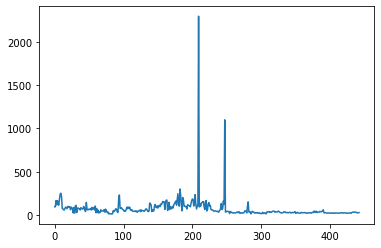

In [ ]:
wingspan = birds['MaxWingspan'] 
wingspan.plot()

What do you notice immediately? There seems to be at least one outlier - that's quite a wingspan! A 2300 centimeter wingspan equals 23 meters - are there Pterodactyls roaming Minnesota? Let's investigate.

While you could do a quick sort in Excel to find those outliers, which are probably typos, continue the visualization process by working from within the plot.

Add labels to the x-axis to show what kind of birds are in question:

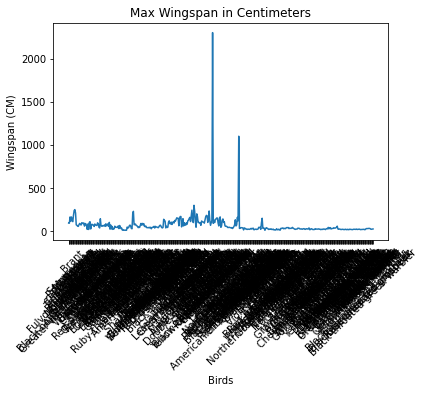

In [ ]:
plt.title('Max Wingspan in Centimeters')
plt.ylabel('Wingspan (CM)')
plt.xlabel('Birds')
plt.xticks(rotation=45)
x = birds['Name'] 
y = birds['MaxWingspan']

plt.plot(x, y)

plt.show()

Even with the rotation of the labels set to 45 degrees, there are too many to read. Let's try a different strategy: label only those outliers and set the labels within the chart. You can use a scatter chart to make more room for the labeling:

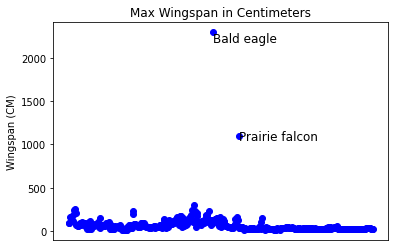

In [ ]:
plt.title('Max Wingspan in Centimeters')
plt.ylabel('Wingspan (CM)')
plt.tick_params(axis='both',which='both',labelbottom=False,bottom=False)

for i in range(len(birds)):
    x = birds['Name'][i]
    y = birds['MaxWingspan'][i]
    plt.plot(x, y, 'bo')
    if birds['MaxWingspan'][i] > 500:
        plt.text(x, y * (1 - 0.05), birds['Name'][i], fontsize=12)
    
plt.show()

What's going on here? You used tick_params to hide the bottom labels and then created a loop over your birds dataset. Plotting the chart with small round blue dots by using bo, you checked for any bird with a maximum wingspan over 500 and displayed their label next to the dot if so. You offset the labels a little on the y axis (y * (1 - 0.05)) and used the bird name as a label.

##Filter your data

Both the Bald Eagle and the Prairie Falcon, while probably very large birds, appear to be mislabeled, with an extra 0 added to their maximum wingspan. It's unlikely that you'll meet a Bald Eagle with a 25 meter wingspan, but if so, please let us know! Let's create a new dataframe without those two outliers:

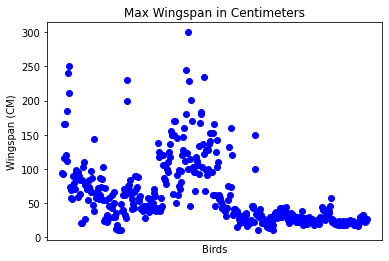

In [ ]:
plt.title('Max Wingspan in Centimeters')
plt.ylabel('Wingspan (CM)')
plt.xlabel('Birds')
plt.tick_params(axis='both',which='both',labelbottom=False,bottom=False)
for i in range(len(birds)):
    x = birds['Name'][i]
    y = birds['MaxWingspan'][i]
    if birds['Name'][i] not in ['Bald eagle', 'Prairie falcon']:
        plt.plot(x, y, 'bo')
plt.show()

By filtering out outliers, your data is now more cohesive and understandable.

Now that we have a cleaner dataset at least in terms of wingspan, let's discover more about these birds.

While line and scatter plots can display information about data values and their distributions, we want to think about the values inherent in this dataset. You could create visualizations to answer the following questions about quantity:

How many categories of birds are there, and what are their numbers? How many birds are extinct, endangered, rare, or common? How many are there of the various genus and orders in Linnaeus's terminology?

##Explore bar charts

Bar charts are practical when you need to show groupings of data. Let's explore the categories of birds that exist in this dataset to see which is the most common by number.

In the notebook file, create a basic bar chart

✅ Note, you can either filter out the two outlier birds we identified in the previous section, edit the typo in their wingspan, or leave them in for these exercises which do not depend on wingspan values.

If you want to create a bar chart, you can select the data you want to focus on. Bar charts can be created from raw data:

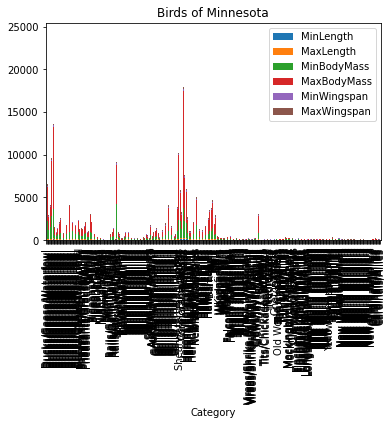

In [ ]:
birds.plot(x='Category',
        kind='bar',
        stacked=True,
        title='Birds of Minnesota')

This bar chart, however, is unreadable because there is too much non-grouped data. You need to select only the data that you want to plot, so let's look at the length of birds based on their category.

Filter your data to include only the bird's category.

✅ Notice that you use Pandas to manage the data, and then let Matplotlib do the charting.

Since there are many categories, you can display this chart vertically and tweak its height to account for all the data:

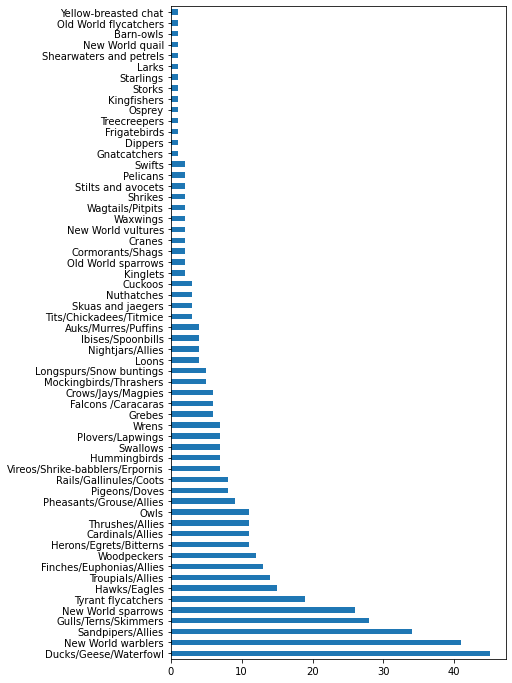

In [ ]:
category_count = birds.value_counts(birds['Category'].values, sort=True)
plt.rcParams['figure.figsize'] = [6, 12]
category_count.plot.barh()

This bar chart shows a good view of the number of birds in each category. In a blink of an eye, you see that the largest number of birds in this region are in the Ducks/Geese/Waterfowl category. Minnesota is the 'land of 10,000 lakes' so this isn't surprising!

✅ Try some other counts on this dataset. Does anything surprise you?

##Comparing data

You can try different comparisons of grouped data by creating new axes. Try a comparison of the MaxLength of a bird, based on its category:

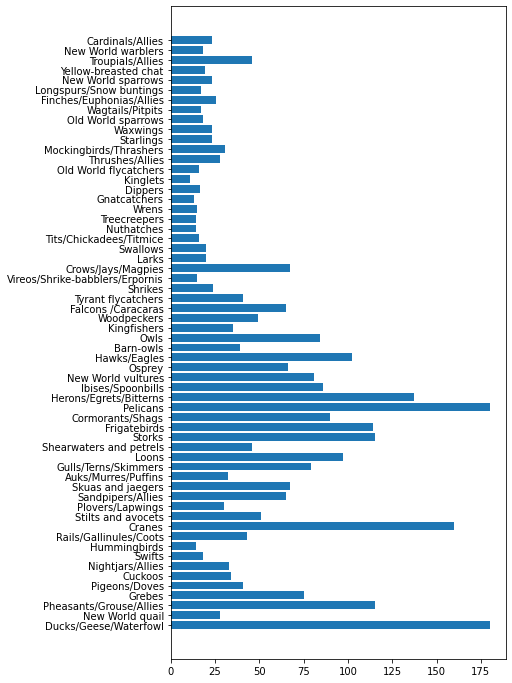

In [ ]:
maxlength = birds['MaxLength']
plt.barh(y=birds['Category'], width=maxlength)
plt.rcParams['figure.figsize'] = [6, 12]
plt.show()

Nothing is surprising here: hummingbirds have the least MaxLength compared to Pelicans or Geese. It's good when data makes logical sense!

You can create more interesting visualizations of bar charts by superimposing data. Let's superimpose Minimum and Maximum Length on a given bird category:

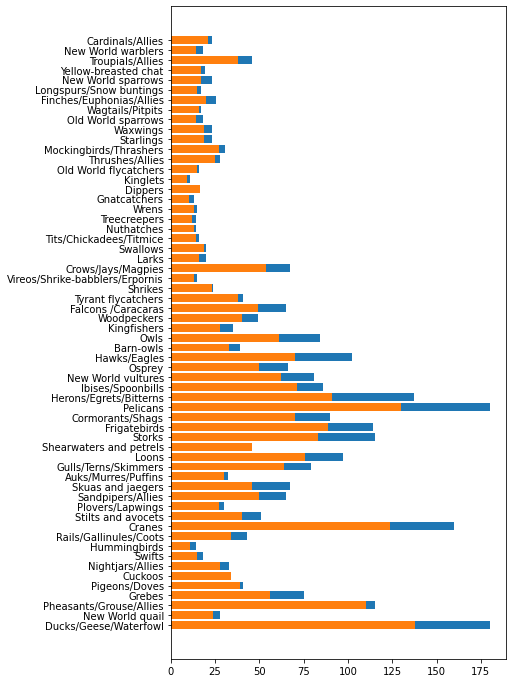

In [ ]:
minLength = birds['MinLength']
maxLength = birds['MaxLength']
category = birds['Category']

plt.barh(category, maxLength)
plt.barh(category, minLength)

plt.show()

In this plot, you can see the range per bird category of the Minimum Length and Maximum length. You can safely say that, given this data, the bigger the bird, the larger its length range. Fascinating!